# Data visualisation

### Libraries

In [61]:
import TFIDF
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Histogram


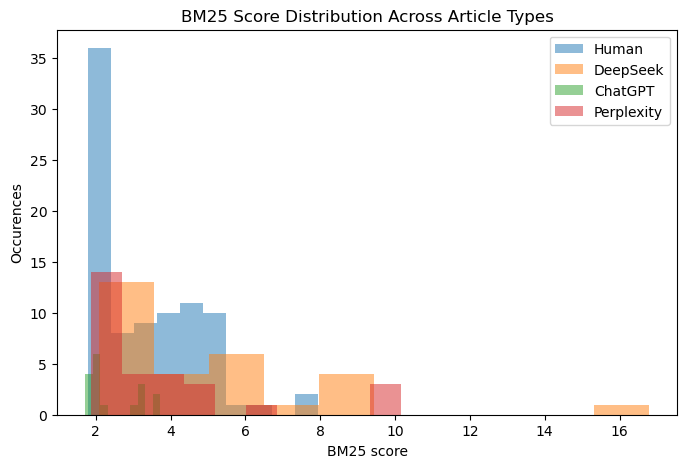

In [ ]:
plt.figure(figsize=(8, 5))


nonzeroHuman = TFIDF.scoresHumanArticles[TFIDF.scoresHumanArticles > 0.5]
nonzeroDeepSeek = TFIDF.scoresDeepSeekArticles[TFIDF.scoresDeepSeekArticles > 0.5]
nonzeroChatGPT = TFIDF.scoresChatGPTArticles[TFIDF.scoresChatGPTArticles > 0.5]
nonzeroPerplexity = TFIDF.scoresPerplexityArticles[TFIDF.scoresPerplexityArticles > 0.5]

plt.hist(nonzeroHuman, bins=10, alpha=0.5, label="Human")
plt.hist(nonzeroDeepSeek, bins=10, alpha=0.5, label="DeepSeek")
plt.hist(nonzeroChatGPT, bins=10, alpha=0.5, label="ChatGPT")
plt.hist(nonzeroPerplexity, bins=10, alpha=0.5, label="Perplexity")
plt.xlabel("BM25 score")
plt.ylabel("Occurences")
plt.title("BM25 Score Distribution Across Article Types")
plt.legend()
plt.show()

### Boxplot


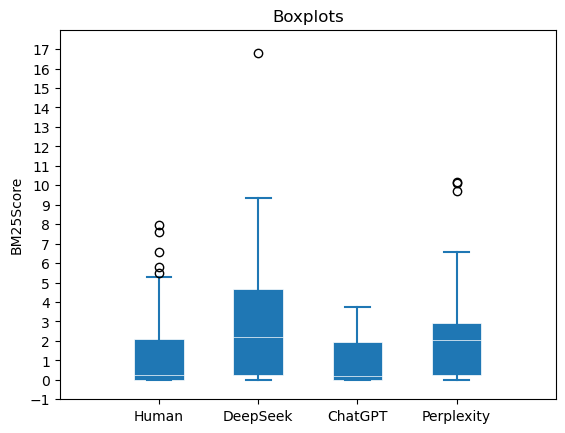

In [71]:
fig, ax = plt.subplots()

positions = [2,4,6,8]

VP = ax.boxplot([TFIDF.scoresHumanArticles, TFIDF.scoresDeepSeekArticles, TFIDF.scoresChatGPTArticles, TFIDF.scoresPerplexityArticles], positions = positions , widths=1, patch_artist=True, 
                showmeans=False, showfliers=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})

ax.set(xlim=(0, 10), xticks=np.arange(1, 10),
       ylim=(-1, 18), yticks=np.arange(-1, 18))

labels = ['Human', 'DeepSeek', 'ChatGPT', 'Perplexity']

ax.set_xticks(positions)
ax.set_xticklabels(labels)

ax.set_title('Boxplots')
plt.ylabel("BM25Score")

plt.show()

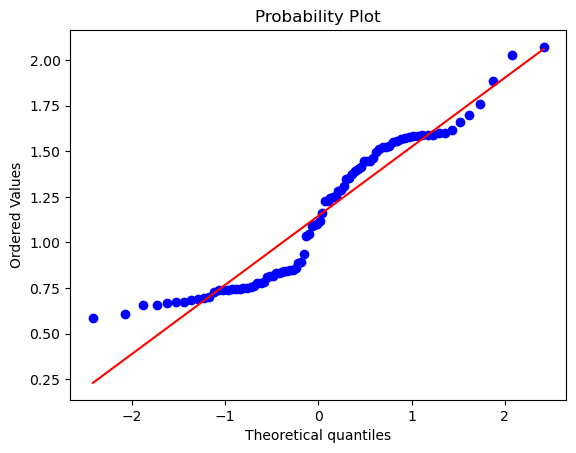

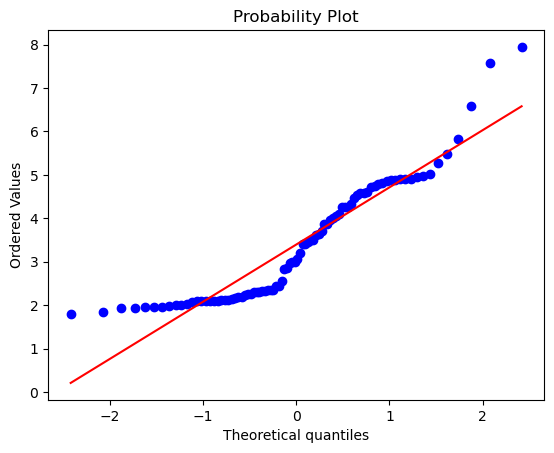

np.float64(0.4007220216606498)

In [64]:
nonzero = TFIDF.scoresHumanArticles[TFIDF.scoresHumanArticles > 0.5]
stats.probplot(np.log(nonzero), dist="norm", plot=plt)
plt.show()

nonzero = TFIDF.scoresHumanArticles[TFIDF.scoresHumanArticles > 0.5]
stats.probplot(nonzero, dist="norm", plot=plt)
plt.show()

zeros = np.sum(TFIDF.scoresHumanArticles == 0)
zero_fraction = zeros / len(TFIDF.scoresHumanArticles)
zero_fraction



# Statistik


### Confidence interval

In [67]:
CIHuman = stats.t.interval(0.95, len(TFIDF.scoresHumanArticles)-1, loc=np.mean(TFIDF.scoresHumanArticles), scale=stats.sem(TFIDF.scoresHumanArticles))
CIDeepSeek = stats.t.interval(0.95, len(TFIDF.scoresDeepSeekArticles)-1, loc=np.mean(TFIDF.scoresDeepSeekArticles), scale=stats.sem(TFIDF.scoresDeepSeekArticles))
CIChatGPT = stats.t.interval(0.95, len(TFIDF.scoresChatGPTArticles)-1, loc=np.mean(TFIDF.scoresChatGPTArticles), scale=stats.sem(TFIDF.scoresChatGPTArticles))
CIPerplexity = stats.t.interval(0.95, len(TFIDF.scoresPerplexityArticles)-1, loc=np.mean(TFIDF.scoresPerplexityArticles), scale=stats.sem(TFIDF.scoresPerplexityArticles))
CIHuman,CIDeepSeek,CIChatGPT,CIPerplexity

((np.float64(0.9591294054669097), np.float64(1.3648244515405183)),
 (np.float64(1.879037183246051), np.float64(3.814932716939525)),
 (np.float64(0.5638913962525274), np.float64(1.237715883591627)),
 (np.float64(1.5131048762517163), np.float64(2.988409275778085)))

### two sample t-test

In [80]:
HumanVSDeepseek = stats.ttest_ind(a=TFIDF.scoresHumanArticles, b=TFIDF.scoresDeepSeekArticles, equal_var=False)
HumanVSChatGPT = stats.ttest_ind(a=TFIDF.scoresHumanArticles, b=TFIDF.scoresChatGPTArticles, equal_var=False)
HumanVSPerplexity = stats.ttest_ind(a=TFIDF.scoresHumanArticles, b=TFIDF.scoresPerplexityArticles, equal_var=False)
float(HumanVSDeepseek.pvalue), float(HumanVSChatGPT.pvalue), float(HumanVSPerplexity.pvalue)

(0.0012017758175345641, 0.18777822860652757, 0.005980794826218737)

### Sample size


In [84]:
n = 1/4*(stats.norm.ppf(0.975)/0.05)**2
float(n)

384.14588206941244